Lab 5: Eigenvalue and Eigenvector Problems

In this lab we will learn how to find the eigenvalues and eigenvectors of a matrix, as well as diagonalize this matrix.  We will then consider a general 3-spring, 2-mass problem.  In particular, we will numerically solve this matrix differential equation for some initial conditions and animate the resultant behavior.  We will then find the eigenvector directions and see how the oscillations look in this basis.

In [ ]:
import numpy as np
import math
from numpy import linalg as LA
#get_ipython().magic('matplotlib inline')
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib import animation, rc
from IPython.display import HTML
import random

In [ ]:
#Eigenvalues and vectors
#First remember how to declare a matrix using numpy
M_1 = np.array([[7,2],[2,-4]])

#now for the eigenvalues (in w), and eigenvectors (in v):
w, v = LA.eig(M_1)
#w is a numpy array, and the individual eigenvalues can be accessed using w[i] 
#(i.e. w[0] is the first eigenvalue, and w[1] is the second eigenvalue)
#the eigenvectors are the columns of the matrix v.  i.e. the eigenvector corresponding to
#the eigenvalue w[i] is v[:,i]
print("For Matrix \n", M_1,"\n")
for i in range(0,w.shape[0]):  #w.shape[0] is the size of w, i.e. the number of eigenvalues
    print("Eigenvalue #",i+1," is (",w[i],"), \n and its corresponding eigenvector is: ", v[:,i],"\n")
print(w)
print(v)  
#Also, note that the eigenvectors are chosen to be unit eigenvectors

For Matrix 
 [[ 7  2]
 [ 2 -4]] 

Eigenvalue # 1  is ( 7.352349955359813 ), 
 and its corresponding eigenvector is:  [0.98483334 0.17350299] 

Eigenvalue # 2  is ( -4.352349955359813 ), 
 and its corresponding eigenvector is:  [-0.17350299  0.98483334] 

[ 7.35234996 -4.35234996]
[[ 0.98483334 -0.17350299]
 [ 0.17350299  0.98483334]]


In [ ]:
#Your Turn!  Try creating a 3x3 matrix and compute/display its eigenvalues and vectors.
#note that these can involve complex numbers.
M_2 = np.array([[5,2,7],[2,-4,7],[3,6,5]])

w, v = LA.eig(M_2)
print("For Matrix \n", M_2,"\n")
print(w)
print(v)
for i in range(0,w.shape[0]):  #w.shape[0] is the size of w, i.e. the number of eigenvalues
    print("Eigenvalue #",i+1," is (",w[i],"), \n and its corresponding eigenvector is: ", v[:,i],"\n")
    u = v[:,i]
    print(u)
    lam = w[i]
    print(lam)
    leftHandEqu=np.dot(M_2,u)
    rightHandEqu=lam*u
    print(leftHandEqu)
    print(rightHandEqu)
    print("checking if it's true or not Eigenvector equation: A*v = lambda*v \n", round(leftHandEqu[0],8) == round(rightHandEqu[0],8),"\n")
#Show that the eigenvectors we get numerically do solve the eigenvector equation: A*v = lambda*v
#remember that matrix multiplication, A*v, is given by np.dot(A,v), 
#while scalar multiplication, lambda*v, is just achieved with the usual "*" character


u = v[:,1]
print(u)
lam = w[1]
print(lam)
print(np.dot(M_2,u))
print(lam*u)

For Matrix 
 [[ 5  2  7]
 [ 2 -4  7]
 [ 3  6  5]] 

[12.          1.35889894 -7.35889894]
[[ 0.70982818  0.89155357 -0.11573118]
 [ 0.35491409 -0.19882451 -0.88221986]
 [ 0.60842415 -0.40694109  0.45639282]]
Eigenvalue # 1  is ( 12.0 ), 
 and its corresponding eigenvector is:  [0.70982818 0.35491409 0.60842415] 

[0.70982818 0.35491409 0.60842415]
12.0
[8.51793813 4.25896906 7.30108982]
[8.51793813 4.25896906 7.30108982]
checking if it's true or not Eigenvector equation: A*v = lambda*v 
 True 

Eigenvalue # 2  is ( 1.358898943540673 ), 
 and its corresponding eigenvector is:  [ 0.89155357 -0.19882451 -0.40694109] 

[ 0.89155357 -0.19882451 -0.40694109]
1.358898943540673
[ 1.2115312  -0.27018242 -0.55299181]
[ 1.2115312  -0.27018242 -0.55299181]
checking if it's true or not Eigenvector equation: A*v = lambda*v 
 True 

Eigenvalue # 3  is ( -7.358898943540673 ), 
 and its corresponding eigenvector is:  [-0.11573118 -0.88221986  0.45639282] 

[-0.11573118 -0.88221986  0.45639282]
-7.35889

In [ ]:
#Random numbers (really pseudo-random, but the best we got until your computer starts sampling quantum processes)
#We can create random integers between -10 and +10 by calling the following function
rnum = random.randint(-10,11)
print("Our first random number for today is: ", rnum)

#if you want a random floating point number between 0 and 1.0, use:
rnum2 = random.random()
print("Our second random number for today is: ", rnum2)

#to get a random float between two given numbers, you can just do a little algebra
nlow = -4
nhigh = 11
rnum3 = random.random()*(nhigh-nlow)+nlow
print("Our third random number for today is: ", rnum3)

Our first random number for today is:  -6
Our second random number for today is:  0.9243628054109186
Our third random number for today is:  0.656994927309464


In [ ]:
#Your turn! Random Matrix, Symmetric Matrices, and real eigenvalues
#Create a 3x3 matrix whose elements are a mix of random integers between -1 and 14,
#and random floating point numbers between -pi and 3*pi

rnum = random.randint(-1,14)
print("Our first random number for today is: ", rnum)

#now create a new matrix from this one, by multiplying it by its transpose (remember traspose: A.transpose())
#Verify that this is a symmetric matrix just by inspection.

#Finally, find the eigenvalues of this matrix

#Do you see any complex eigenvalues?  It turns out that symmetric matrices always have real eigenvalues.

In [ ]:
#Change of basis.  
#Often, we will want to change our basis to coincide with the eigenvectors of a transformation matrix
#let's see how to do this using a symmetric matrix
M_2 = np.dot(M_1,M_1.transpose())
w2, v2 = LA.eig(M_2)  #getting the eigenvalues and eigenvectors

#It turns out that the matrix we need to enact this change of basis is the inverse of v2
v2inv = np.linalg.inv(v2)
#Any vector (s) can now be described in this new eigen-basis by np.dot(v2inv,s)
#In particular, notice that v2inv represents the two eigenvectors in a particularly simple manner:
print("In the eigen-basis, the first eigenvector is: ",np.dot(v2inv,v2[:,0]))
print("In the eigen-basis, the second eigenvector is: ",np.dot(v2inv,v2[:,1]))

#the original matrix can also be expressed in the eigen-basis.
#This is given by v2inv*M_2*v2
M_2new = np.dot(np.dot(v2inv,M_2),v2)
print("In the eigen-basis, the matrix \n", M_2, "\n is now expressed as \n",M_2new)

#Notice that the matrix which results is a diagonal matrix, and the diagonal entries are just the eigenvalues

In the eigen-basis, the first eigenvector is:  [1. 0.]
In the eigen-basis, the second eigenvector is:  [0. 1.]
In the eigen-basis, the matrix 
 [[53  6]
 [ 6 20]] 
 is now expressed as 
 [[ 5.40570499e+01 -1.77635684e-15]
 [-8.88178420e-16  1.89429501e+01]]


In [ ]:
#Your turn!  Show that this new matrix (M_2new from the previous cell) represents the same geometric transformation
#as does M_2, but just in the eigen-basis.
#To do this, create an arbitray 2x1 column matrix (to represent an initial vector in the original coordinate system)
vec1 = np.array([[13],[-7]])
print("the vector I chose (in the original basis) is \n", vec1)

#Part 1) transform this using the original matrix M_2
vec1trans = np.dot(M_2,vec1)
print("\n M_2 transforms this vector to: \n ", vec1trans)
print("which is a new vector, still expressed in the original basis")

#Part 2) first re-express the original vector in the eigenbasis, transform it using M_2new, 
#then change the basis back to the original basis (using the inverse of v2inv ... i.e. v2)
vec1prime = np.dot(v2inv,vec1)
print("\n The original vector expressed in the eigen-basis is: \n ", vec1prime)
vec1primetrans = np.dot(M_2new,vec1prime)
print("\n Now, using the transformation in the eigen-basis, we get: \n ", vec1primetrans)

print("\n to compare this to the result of the original transformation, we need to re-express this vector in the original basis")
vec1primetransrev = np.dot(v2,vec1primetrans)
print("This gives the following vector: \n ", vec1primetransrev)

#Now compare the two vectors.  They should be the same
print("\n these two vectors should be the same: \n ", vec1trans,"\n and \n", vec1primetransrev)

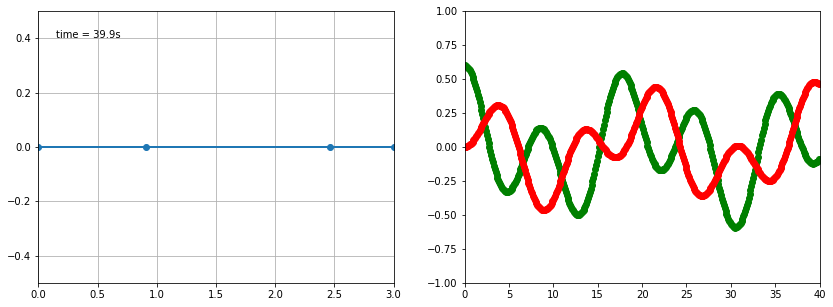

In [ ]:
#Ok, now for some fun.  We want to model a general 3 spring, 2-mass system.
#First let's have our constants
k1 = 0.2  #The three spring constants (in N/m)
k2 = 0.5
k3 = 0.3
m1 = 2    #the two masses (in kg)
m2 = 3
param = [k1,k2,k3,m1,m2]  #creating a list of our parameter values

#The displacement of m1 and m2 from their respective equilibria are given by x and y respectively
#if r = [x,y] (column matrix) then the ODE can be given by d^2 r/dt^2 = M*r
#Here M is the matrix

def GetMat(p):  #this assembles the matrix M from the parameters passed in as p
    kt1, kt2, kt3, mt1, mt2 = p 
    return np.array([[-1*(kt1+kt2)/mt1,kt2/mt1],[kt2/mt2,-1*(kt2+kt3)/mt2]])

M = GetMat(param)  #actually creating the matrix

#for numerically solving the ODE, we need a function representing the Right hand side of the ODE
#Actually, we are going to split these two second order ODEs into four first order ODEs
#We define vx = dx/dt, and vy = dy/dt.  Now our ODEs are dv/dt = M*r and dr/dt = [vx,vy]

def derivs(state,t,p):
    x,y,vx,vy = state
    r = np.array([[x],[y]])
    dvdt = np.dot(p,r)
    return [vx,vy,dvdt[0],dvdt[1]]


# create a time array
dt = 0.1
tf = 40
t = np.arange(0.0, tf, dt)

#the initial conditions
x0 = 0.6
y0 = 0.0
vx0 = 0
vy0 = 0
state = [x0,y0,vx0,vy0]  #this is now the initial state of the system

#ODE integration
Trajectories = integrate.odeint(derivs, state, t, args=(M,))

#now we pick out the x and y positions over time
x = Trajectories[:, 0]
y = Trajectories[:, 1]


#Now we start on our animation
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121, autoscale_on=False, xlim=(0, 3), ylim=(-0.5, 0.5))
ax2 = fig.add_subplot(122, autoscale_on=False, xlim=(0, tf), ylim=(-1, 1))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
point, = ax2.plot([],[],'go-', lw=1)
point2, = ax2.plot([],[],'ro-', lw=2)


time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    point.set_data([], [])
    point2.set_data([], [])
    time_text.set_text('')
    return line, time_text, point, point2

#let's say the equlibrium position for each mass is 1 and 2

def animate(i):
    thisx = [0,1+x[i], 2+y[i],3]
    thisy = [0, 0,0,0]

    line.set_data(thisx, thisy)
    tset = [t[j] for j in range(0,i+1)]
    xset = [x[j] for j in range(0,i+1)]
    yset = [y[j] for j in range(0,i+1)]
    point.set_data(tset,xset)
    point2.set_data(tset,yset)
    time_text.set_text(time_template % (i*dt))
    return line, time_text, point, point2

ani = animation.FuncAnimation(fig, animate, np.arange(1, y.shape[0]),
                              interval=25, blit=True, init_func=init)

rc('animation', html='html5')
ani

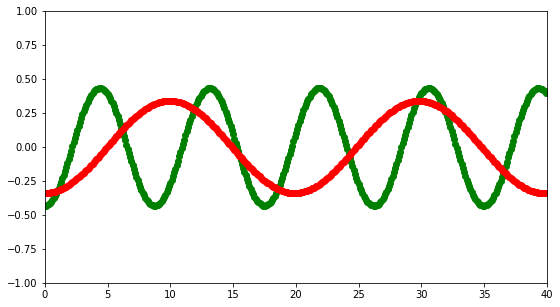

In [ ]:
#Notice how the trace of each particle's position is fairly complicated looking.
#Let's find the eigenvectors, transform into that basis, and re-plot the solution
#first the eigenvectors
w3, v3 = LA.eig(M)

#now create v3inv
v3inv = np.linalg.inv(v3)

#Take the x and y arrays, and create a list of column matrices representing the r = [x,y] vector
rt = [np.array([[x[i]],[y[i]]]) for i in range(0,x.shape[0])]
#now transform each of these vectors to the eigenbasis representation by multiplying by v3inv
rtprime = [np.dot(v3inv,rt[i]) for i in range(0,x.shape[0])]
#finally, split this back up into the new x and new y coordinates (the coordinates for the eigenbasis)
xprime = np.array([rtprime[i][0][0] for i in range(0,x.shape[0])])
yprime = np.array([rtprime[i][1][0] for i in range(0,x.shape[0])])

#now we use xprime and yprime to make a tracer animation

fig2 = plt.figure(figsize=(9,5))
ax3 = fig2.add_subplot(111, autoscale_on=False, xlim=(0, tf), ylim=(-1, 1))

point3, = ax3.plot([],[],'go-', lw=1)
point4, = ax3.plot([],[],'ro-', lw=2)


def init2():
    point3.set_data([], [])
    point4.set_data([], [])
    return point3, point4


def animate2(i):
    tset = [t[j] for j in range(0,i+1)]
    xset = [xprime[j] for j in range(0,i+1)]
    yset = [yprime[j] for j in range(0,i+1)]
    point3.set_data(tset,xset)
    point4.set_data(tset,yset)
    return point3, point4

ani2 = animation.FuncAnimation(fig2, animate2, np.arange(1, yprime.shape[0]),
                              interval=25, blit=True, init_func=init2)

ani2

In [ ]:
#Notice that the motion along each eigen-direction (xprime and yprime) is now quite simple.
#When viewed in the eigenvector basis, the originally complex motion breaks down into the
#simple sum of two sin waves of differing frequency

#We can even find the frequency and period of each.
#the frequency is the square root of the negative of the eigenvalues
omegax = (-w3[0])**(1/2)
omegay = (-w3[1])**(1/2)
print("The angular frequencies are omega_x = ", omegax, ", and omega_y = ", omegay,", (both in radian per second)")
#the period is just 2pi/omega
Tx = 2*math.pi/omegax
Ty = 2*math.pi/omegay

print("The periods are Tx = ", Tx, ", and Ty = ",Ty, ", (both in seconds)")

The angular frequencies are omega_x =  0.7187952884282608 , and omega_y =  0.31622776601683794 , (both in radian per second)
The periods are Tx =  8.741272248623925 , and Ty =  19.869176531592203 , (both in seconds)


In [ ]:
#Play around with the input parameters that define the springs and masses to see what you get